In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from dateutil.relativedelta import relativedelta
from sklearn.preprocessing import MinMaxScaler

In [2]:
FOLDER_PATH = "graph_ver.3.0/"

# 폴더 있는지 확인하고 없으면 새로 만든다.
import os
try:
    if not os.path.exists(FOLDER_PATH):
        os.makedirs(FOLDER_PATH)
except:
    print(f"Error: Do not create foler. {FOLDER_PATH}")

# 원본데이터
---

In [3]:
#############################################################################
FILE_PATH_RAW = "/Users/sungjune/Downloads/PJ3/main_dataset(2015~2021).csv"
#############################################################################

raw_data = pd.read_csv(FILE_PATH_RAW)
raw_data.drop(columns="Unnamed: 0", inplace=True)

/Users/sungjune/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (11,21,23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [47]:
raw = raw_data.copy()
raw["DELNG_DE"] = \
    pd.to_datetime(raw["DELNG_DE"], format="%Y%m%d").dt.normalize()

raw_garak = \
    raw_data.loc[
        raw_data["PBLMNG_WHSAL_MRKT_NM"] == "서울가락도매",
        ["DELNG_DE", "PBLMNG_WHSAL_MRKT_NM", "PRICE"]
    ].copy()
raw_garak["DELNG_DE"] = \
    pd.to_datetime(raw_garak["DELNG_DE"], format="%Y%m%d")

In [48]:
def graph_past_1y(data, title):
    data1 = data.copy()
    # 최근 1년만 추출
    today_dates = datetime.date.today().strftime("%Y%m%d")
    base_dates = \
        (datetime.date.today() - relativedelta(years=1)).strftime("%Y%m%d")
    one_year_ago_date = \
        (datetime.date.today() - relativedelta(years=1)).strftime("%Y-%m-%d")
    print(f"기준일: {one_year_ago_date}")
    ds = data1[data1["DELNG_DE"] >= one_year_ago_date]

    # datetime to str
    temp_y = ds["DELNG_DE"].dt.year.astype("str")
    temp_m = ds["DELNG_DE"].dt.month.astype("str")
    temp_d = ds["DELNG_DE"].dt.day.astype("str")
    ds["DELNG_DE"] = (
        temp_y + '-' +
        temp_m.apply(lambda x: format(x, '0>2')) 
        + '-' 
        + temp_d.apply(lambda x: format(x, '0>2'))
    )

    plt.figure(figsize=(30, 15))
    import platform 
    if platform.system() == "Darwin":
        sns.set_theme(
            style="whitegrid",
            font="AppleGothic", 
            rc={"axes.unicode_minus": False},
        )
    sns.boxplot(
        x="DELNG_DE",
        y="PRICE",
        data=ds,
        whis=1.5, # IQR
        linewidth=0.5, # 라인 굵기
        # fliersize=0.5, # 이상치 사이즈
        showfliers=False, # 이상치 숨김
        # showcaps=False, # 꼬리 숨김
        medianprops=dict(color="white", alpha=0.9, linewidth=1), # 중앙값
        )

    plt.title(
        f"{title}({base_dates}~{today_dates})",
        pad=20,
        fontsize=40,
        fontweight="heavy",
        color="darkgreen"
    )
    plt.yticks( # y축 값
        fontsize=20,
        color="darkgreen",
    ) 
    plt.xticks( # x축 값
        rotation=90, 
        fontsize=6,
        color="darkgreen",
    )
    plt.ylim(0, 10000) # y축 범위
    plt.ylabel(
        "PRICE(₩)",
        labelpad=10, # 축과 여백
        fontsize=30,
        fontweight="bold",
        color="darkgreen"
        # loc="right" # 위치 ["top", "center", "bottom"]
    )
    plt.xlabel(
        "",
        labelpad=10, # 축과 여백
        fontsize=30,
        fontweight="bold",
        color="darkgreen"
    )
        
    plt.savefig(
        f"{FOLDER_PATH}{title}_{base_dates}_{today_dates}.png",
        transparent = True, # 배경색 투명하게
        dpi=200, # 해상도
    )

기준일: 2020-10-07


<ipython-input-48-009927088ba5>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds["DELNG_DE"] = (


기준일: 2020-10-07


<ipython-input-48-009927088ba5>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds["DELNG_DE"] = (


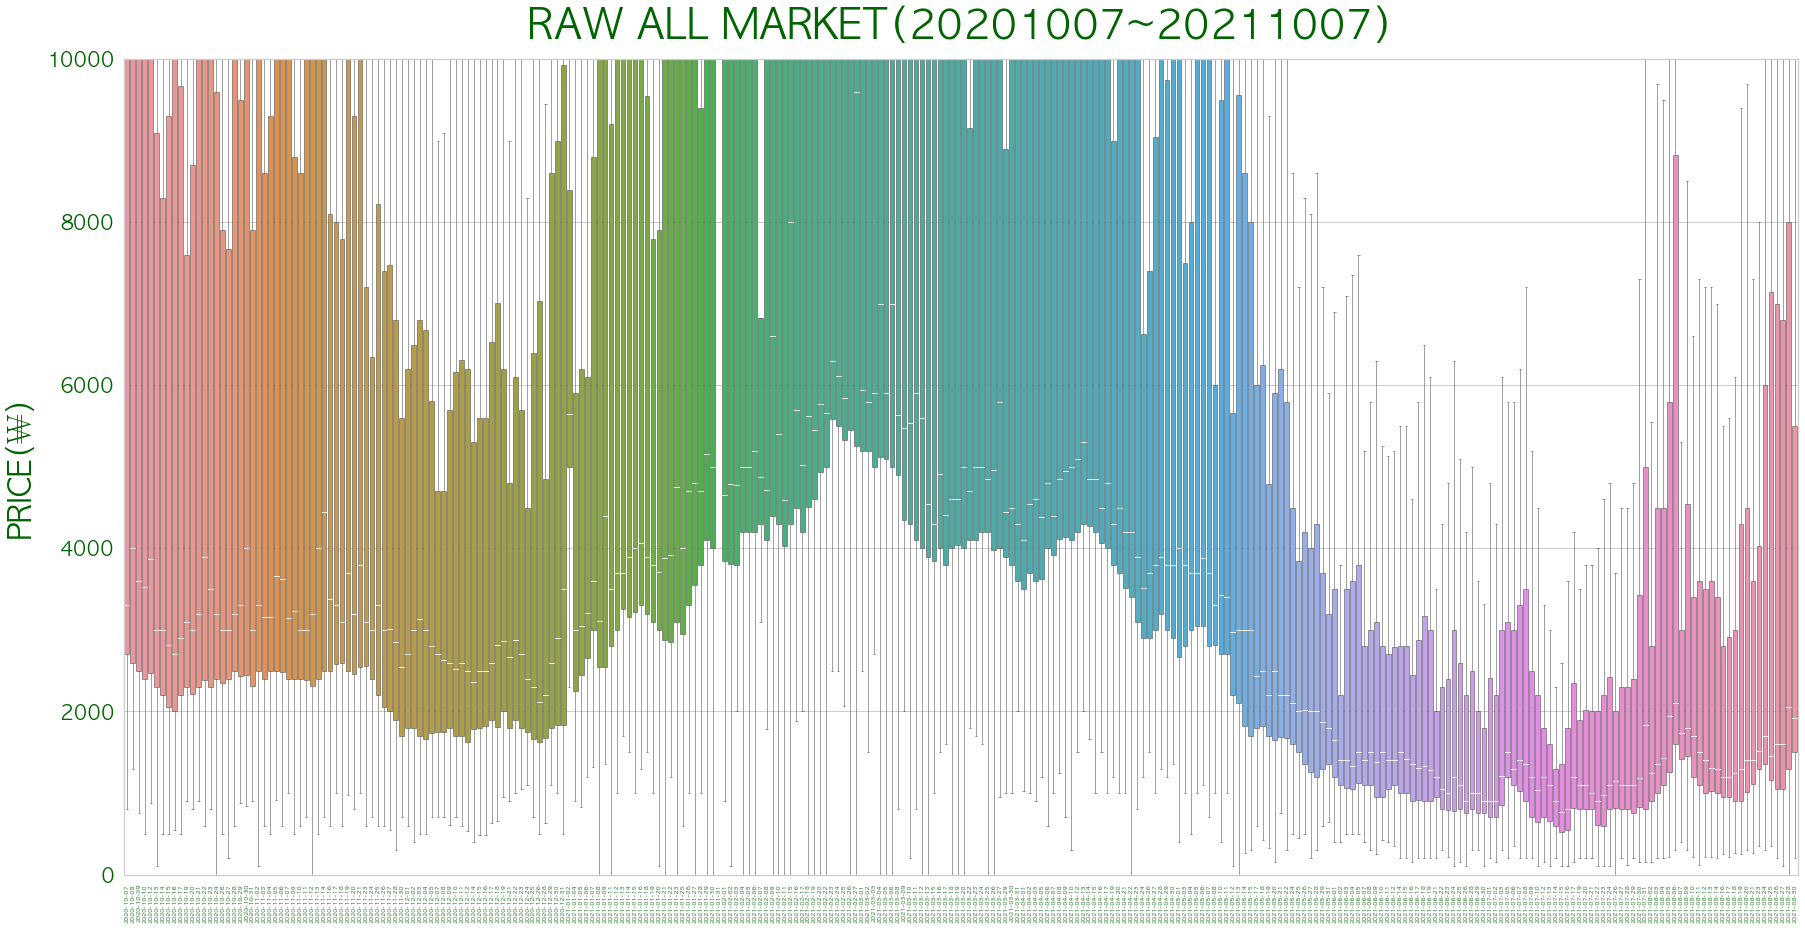

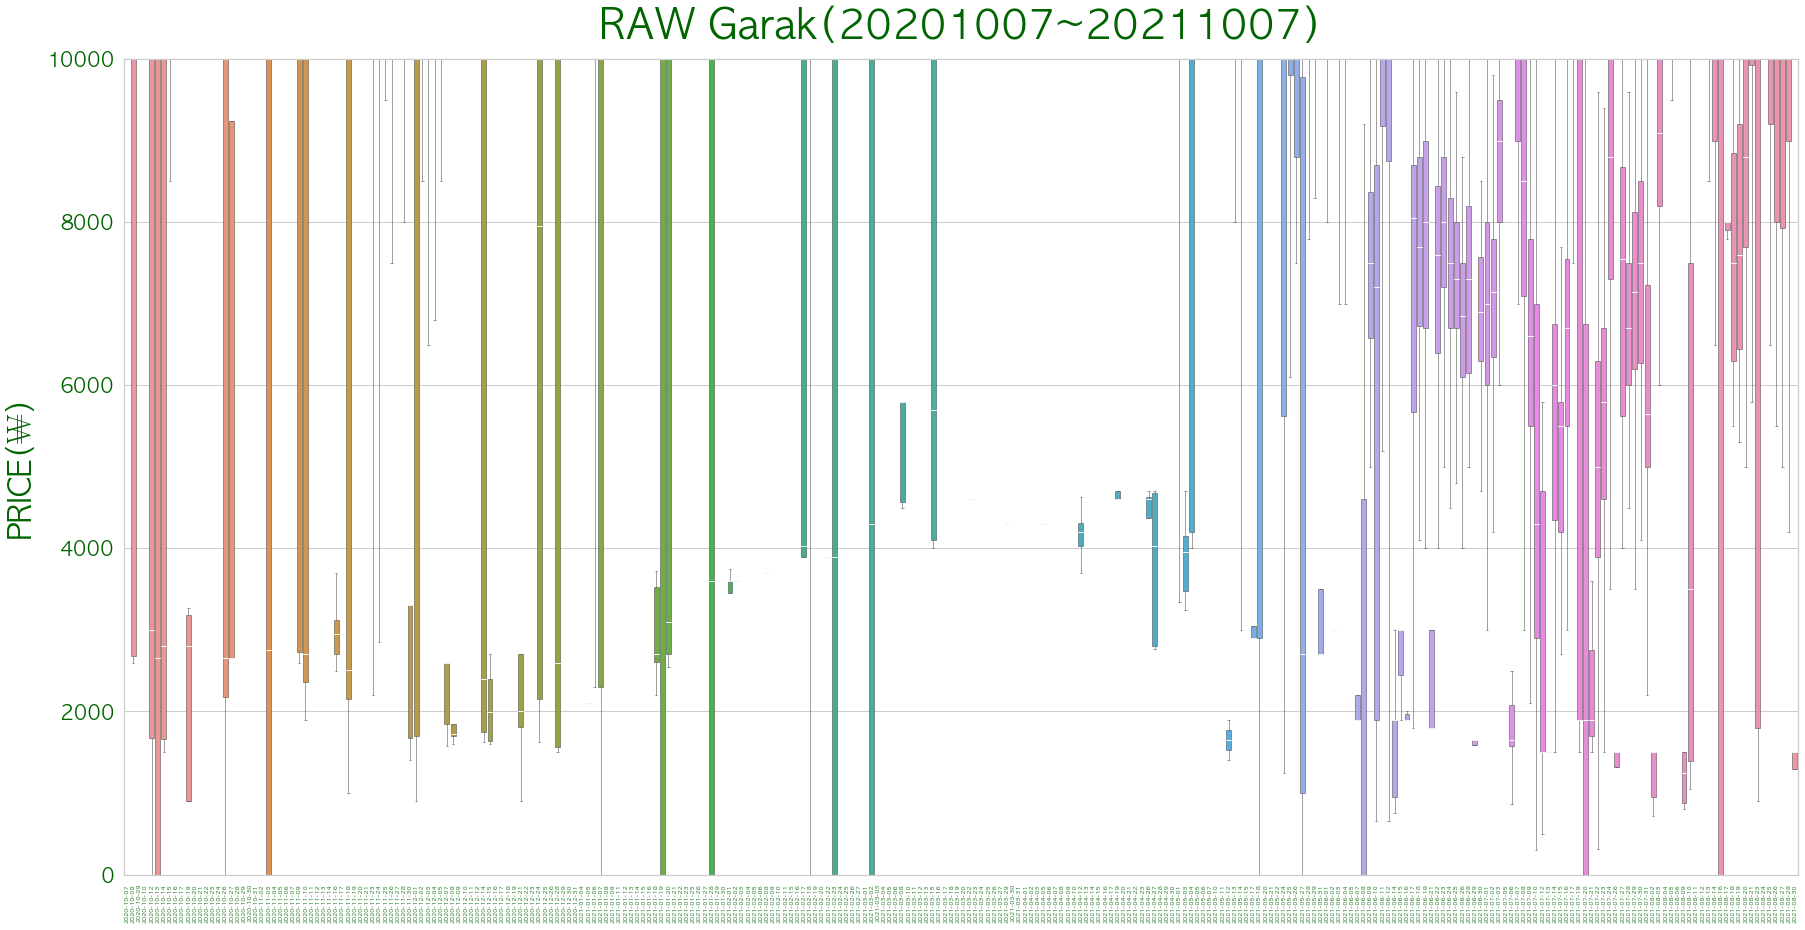

In [49]:
graph_past_1y(raw, "RAW ALL MARKET")
graph_past_1y(raw_garak, "RAW Garak")

# 지역 추출 전 데이터
---

In [50]:
#############################################################################
FILE_PATH_EDA = "도매_EDA_완료_new_v3.0.csv"
#############################################################################
raw_data_eda = pd.read_csv(FILE_PATH_EDA)
raw_data_eda.drop(columns="Unnamed: 0", inplace=True)

In [54]:
eda_all = raw_data_eda.copy()
eda_all = eda_all[["DELNG_DE", "PBLMNG_WHSAL_MRKT_NM", "PRICE"]].copy()
eda_all["DELNG_DE"] = pd.to_datetime(eda_all["DELNG_DE"], format="%Y%m%d")

eda_garak = \
    raw_data_eda.loc[
        raw_data_eda["PBLMNG_WHSAL_MRKT_NM"] == "서울가락도매",
        ["DELNG_DE", "PBLMNG_WHSAL_MRKT_NM", "PRICE"]
    ].copy()
eda_garak["DELNG_DE"] = \
    pd.to_datetime(eda_garak["DELNG_DE"], format="%Y%m%d")

In [56]:
graph_past_1y(eda_all, "EDA ALL MARKET")
graph_past_1y(eda_garak, "EDA Garak")

기준일: 2020-10-07


<ipython-input-48-009927088ba5>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds["DELNG_DE"] = (
